# Assignment

For this assignment you will calculate and plot the distribution of the path lengths of a graph. First we will generate a random graph which we will use for the assignment:

In [9]:
import networkx as nx

random_graph = nx.erdos_renyi_graph(77, 0.087)
print(nx.info(random_graph))

Name: gnp_random_graph(77,0.087)
Type: Graph
Number of nodes: 77
Number of edges: 262
Average degree:   6.8052


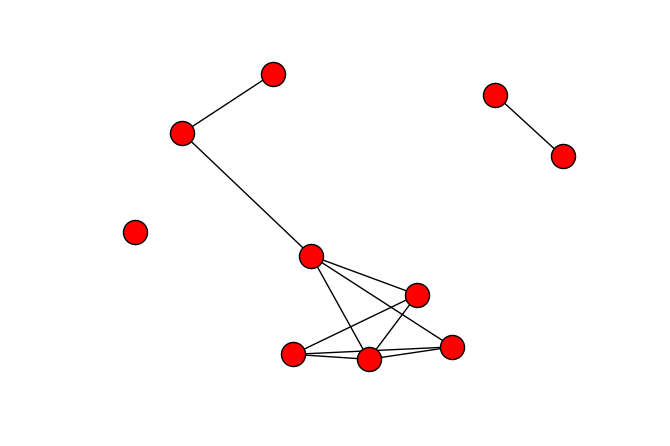

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

g = nx.erdos_renyi_graph(10, 0.2)
nx.draw(g)
plt.show()

In [24]:
for i in g:
    print (i, g.degree(i))

0 2
1 2
2 1
3 3


In [90]:
shortest = []
node_visited = []
queue = []
for node in g:  
    queue.append(node)
    node_visited.append(node)
    level = {}
    i = 1
    while queue:
        current = queue.pop(0) 
        for neb in g.neighbors_iter(current):
            if neb not in level and neb not in node_visited:
                level[neb] = i
                queue.append(neb)
        i += 1 
    for key in level:
        shortest.append(level[key])  
print (shortest)

[2, 1, 1, 2, 1, 2, 1]


## 1. Finding path lengths

Networkx provides a shortest [path length function](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html) which you can use to get the shortest path between nodes in a graph. Try out some of the examples in the documentation using the random graph we made above until you get familiar with how it works and what type of output it gives.

Next write a function that will return a list of the shortest path **lengths** between all pairs of nodes (make sure each pair is only counted once). This function should take a single argument, `G`, a networkx graph.

In [129]:
def all_shortest_path_lengths(G):
    shortest = []
    node_visited = []
    for node in G: 
        try:
            Current = [node]
            node_visited.append(node)
            level = {}
            i = 1
            while Current:
                Next = []
                for c in Current: 
                    for neb in G.neighbors_iter(c):
                        if neb not in level and neb not in node_visited:
                            level[neb] = i
                            Next.append(neb)
                Current = Next
                i += 1 
            for key in level:
                #shortest.append(level[key]) 
                shortest.append(level.items())
        except:
            pass        
    return (shortest)

In [107]:
shortest = all_shortest_path_lengths(g)
print (shortest)

[1, 2, 1, 1, 2, 3, 3, 4, 1, 2, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1]


In [126]:
def all_shortest_path_lengths(G):
    shortest = []
    node_visited = []
    queue = []
    for node in G:  
        try:
            queue.append(node)
            node_visited.append(node)
            level = {}
            i = 1
            while queue:
                current = queue.pop(0) 
                for neb in G.neighbors_iter(current):
                    if neb not in level and neb not in node_visited:
                        level[neb] = i
                        queue.append(neb)
                i += 1 
            for key in level:
                shortest.append(level[key])                  
        except:
            pass
    return (shortest)

In [109]:
shortest = all_shortest_path_lengths(g)
print (shortest)

[1, 2, 1, 1, 3, 6, 4, 5, 1, 2, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1]


Apply your function to the ```random_graph``` and assign the list of shortest path lengths to a variable:

In [130]:
# your code here
shortest = all_shortest_path_lengths(random_graph)

In [131]:
print (shortest[:10])

[dict_items([(1, 4), (2, 4), (3, 4), (4, 4), (5, 2), (6, 2), (7, 4), (8, 4), (9, 4), (10, 3), (11, 4), (12, 4), (13, 4), (14, 2), (15, 3), (16, 3), (17, 3), (18, 4), (19, 5), (20, 4), (21, 4), (22, 3), (23, 3), (24, 4), (25, 4), (26, 4), (27, 3), (28, 3), (29, 4), (30, 3), (31, 3), (32, 3), (33, 4), (34, 3), (35, 3), (36, 4), (37, 3), (38, 4), (39, 4), (40, 4), (41, 3), (42, 4), (43, 3), (44, 2), (45, 4), (46, 5), (47, 4), (48, 3), (49, 3), (50, 4), (51, 3), (52, 4), (53, 4), (54, 4), (55, 3), (56, 2), (57, 3), (58, 4), (59, 3), (60, 4), (61, 4), (62, 3), (63, 4), (64, 3), (65, 4), (66, 4), (67, 4), (68, 4), (69, 3), (70, 2), (71, 4), (72, 4), (73, 4), (74, 3), (75, 4), (76, 1), (77, 4), (78, 3), (79, 4), (80, 4), (81, 4), (82, 4), (83, 3), (84, 4), (85, 4), (86, 4), (87, 3), (88, 4), (89, 4), (90, 4), (91, 3), (92, 3), (93, 3), (94, 4), (95, 3), (96, 4), (97, 4), (98, 3), (99, 4), (100, 4), (101, 3), (102, 4), (103, 3), (104, 4), (105, 4), (106, 4), (107, 3), (108, 4), (109, 3), (110,

In [116]:
p=nx.shortest_path(random_graph)

In [132]:
p[9][5]

[9, 235, 322, 67, 1025, 5]

## 2. Visualizing the results
Now that you have a list of the shortest paths for the graph, make a histogram for it. This can be done with [matplotlibs histogram function](http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

This function is fairly useful and lets us quickly visualize a distribution. For instance, if we create a small set of normally distributed random numbers we could use the histogram function to plot the bell curve:

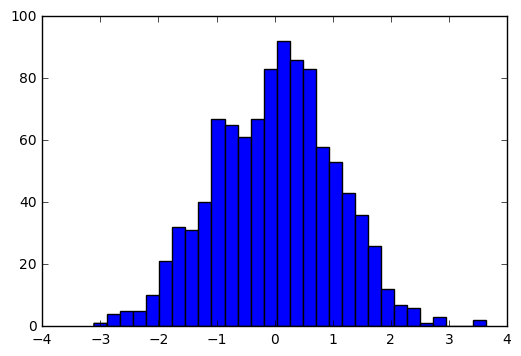

In [6]:
import numpy as np
# Create dummy data
rvs = np.random.normal(size=1000)
# plot histogram
pdf, bins, patch = plt.hist(rvs, bins=30)

You may need to adjust the number of bins so that it is appropriate for the amount of data points you have.

Use the histogram function to make a plot of the results from your shortest paths length function:

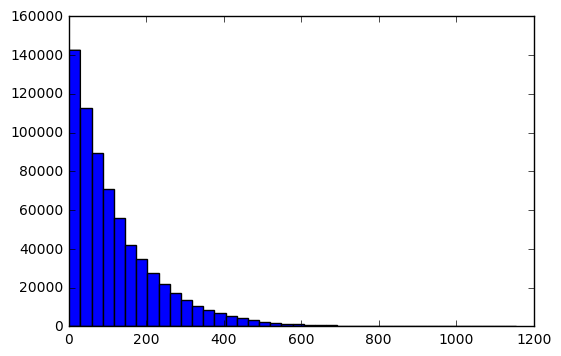

In [111]:
# code here
pdf, bins, patch = plt.hist(shortest, bins=40)

### Name your notebook: shortest_lastname_firstname.ipynb and submit to Canvas